<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1451]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --trusted-host pypi.python.org psycopg2

In [1452]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt 
import plotly.express as px
import requests
from bs4 import BeautifulSoup

In [1453]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [1454]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 


In [1455]:
# текст запроса
query_3_1 = f'''SELECT 
                    count(DISTINCT id) as "Кол-во вакансий в базе"
                FROM vacancies 
'''

In [1456]:
query3_1 = pd.read_sql_query(query_3_1, connection)
query3_1

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/4129198163.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во вакансий в базе
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [1457]:
# текст запроса
query_3_2 = f'''SELECT 
                    count(DISTINCT id) as "Кол-во работодателей в базе"
                FROM employers
'''

In [1458]:
# результат запроса
query3_2 = pd.read_sql_query(query_3_2, connection)
query3_2

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2946212163.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во работодателей в базе
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [1459]:
# текст запроса
query_3_3 = f'''SELECT 
                    count(DISTINCT id) as "Кол-во регионов в базе"
                FROM areas 
'''

In [1460]:
# результат запроса
query3_3 = pd.read_sql_query(query_3_3, connection)
query3_3

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2097640896.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во регионов в базе
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [1461]:
# текст запроса
query_3_4 = f'''SELECT 
                    count(DISTINCT id) as "Кол-во сфер деятельности в базе"
                FROM industries
'''

In [1462]:
# результат запроса
query3_4 = pd.read_sql_query(query_3_4, connection)
query3_4

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3477885426.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во сфер деятельности в базе
0,294


***

In [1463]:
conclusion_3_1 = f'''SELECT 
                    name "Наименование вакансии",
                    count(id) as "Кол-во"
                FROM vacancies 
                GROUP BY 1 
                ORDER BY 2 DESC
'''


In [1464]:
conclusion3_1 = pd.read_sql_query(conclusion_3_1, connection)
conclusion3_1

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2934561888.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Наименование вакансии,Кол-во
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
...,...,...
21218,Генеральный менеджер Проекта,1
21219,Ведущий инженер-программист (1С:УПП),1
21220,Главный специалист IT направления,1
21221,Сотрудник Отдела информационных систем,1


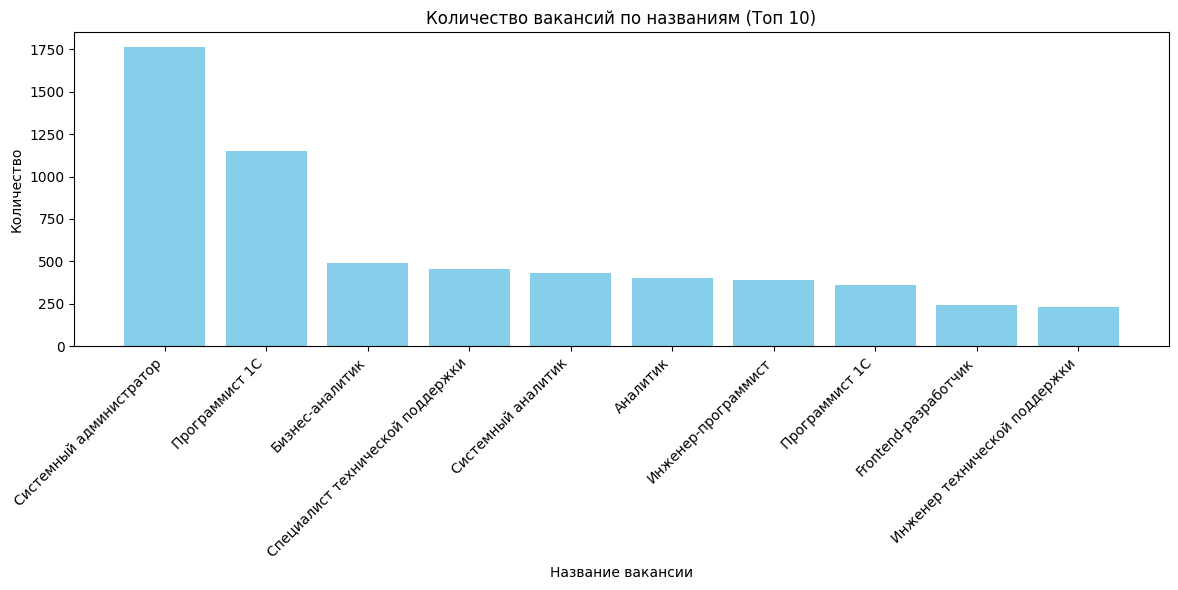

In [1465]:
top_jobs = conclusion3_1.head(10)

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))  # Устанавливаем размер диаграммы
plt.bar(top_jobs['Наименование вакансии'], top_jobs['Кол-во'], color='skyblue')  # Столбчатая диаграмма
plt.xlabel('Название вакансии')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.title('Количество вакансий по названиям (Топ 10)')  # Заголовок графика
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X для удобства чтения
plt.tight_layout()  # Автоматическая настройка параметров графика
plt.show()  # Отображение диаграммы

In [1466]:
conclusion_3_4 = f'''SELECT 
                    i.name "Сферы деятельности",
                    count(ei.employer_id)
                FROM industries i 
                LEFT JOIN employers_industries ei ON i.id = ei.industry_id
                GROUP BY 1 
                ORDER BY 2 DESC
'''
conclusion3_4 = pd.read_sql_query(conclusion_3_4, connection)
conclusion3_4

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3577589267.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Сферы деятельности,count
0,Разработка программного обеспечения,3553
1,"Системная интеграция, автоматизации технологи...",2993
2,"Интернет-компания (поисковики, платежные систе...",1675
3,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
4,Консалтинговые услуги,662
...,...,...
289,"Лифтовое хозяйство (монтаж, сервис, ремонт)",4
290,Ритуальные услуги,4
291,"Ботанический сад, зоопарк, заповедник",3
292,Автошкола,3


**Предварительный анализ данных. ВЫВОДЫ:**

1. База данных содержит **49,197 различных вакансий**. 
   - Вакансии, связанные с программистами, часто дублируются из-за использования различных языков (например, "Программист 1С"). Это необходимо учесть для обучения моделей, чтобы избежать путаницы. (на графику выше видно, что в топ-10 входит две вакансии "Программист 1С", скорее всего при добавлении в базу использовали букву С на русском и английском языке)

2. В базе данных зарегистрировано **23,501 работодателей**, что говорит о разнообразии и конкурентоспособности рынка труда.

3. **Количество регионов** составляет **1,362**, что позволяет проводить анализ по различным географическим единицам.

4. Большое кол-во компаний в базе связаны с ИТ, онако в базе присутствуют также вакансии, не связанные с ИТ, для машинного обучения эти данные нужно резделить-расформировать. 

Топ-5 сфер деятельности: 
   - Разработка ПО
   - Системная автоматизация
   - Автоматизация бизнес-процессов
   - ИТ и интернет-компании
   - Маркетинговые услуги



Рекомендация: разделить вакансии на категории, связанные с ИТ, и не связанные с ИТ.


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [1467]:
# текст запроса
query_4_1 = f'''SELECT 
                    a.name "Регион",
                    count(v.id) as "Кол-во вакансий"
                FROM areas a 
                LEFT JOIN vacancies v ON v.area_id=a.id
                GROUP BY 1 
                ORDER BY 2 DESC
'''

In [1468]:
# результат запроса
query4_1 = pd.read_sql_query(query_4_1, connection)
query4_1

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/653128043.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Регион,Кол-во вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [1469]:
# текст запроса
query_4_2 = f'''SELECT 
                    count(id) as "Кол-во вакансий"
                FROM vacancies 
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [1470]:
# результат запроса
query4_2 = pd.read_sql_query(query_4_2, connection)
query4_2

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2585065628.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во вакансий
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [1471]:
# текст запроса
query_4_3 = f'''SELECT 
                    ROUND(AVG(salary_from)) AS "Средняя нижняя граница зарплаты",
                    ROUND(AVG(salary_to)) AS "Средняя верхняя граница зарплаты"
                FROM vacancies 
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [1472]:
# результат запроса
query4_3 = pd.read_sql_query(query_4_3, connection)
query4_3

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1797600360.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Средняя нижняя граница зарплаты,Средняя верхняя граница зарплаты
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [1473]:
# текст запроса
query_4_4 = f'''SELECT 
                    count(id) as "Кол-во вакансий", 
                    schedule as "Тип рабочего графика",
                    employment as "Тип трудоустройства"
                FROM vacancies
                GROUP BY 2,3
                ORDER BY 1 DESC
'''

In [1474]:
# результат запроса
query4_4 = pd.read_sql_query(query_4_4, connection)
query4_4

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1072758319.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во вакансий,Тип рабочего графика,Тип трудоустройства
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [1475]:
# текст запроса
query_4_5 = f'''SELECT 
                    experience as "Требуемый опыт работы",
                    COUNT(id)
                FROM vacancies
                GROUP BY 1
                ORDER BY 1 
'''

In [1476]:
# результат запроса
query4_5 = pd.read_sql_query(query_4_5, connection)
query4_5

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1689560312.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Требуемый опыт работы,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 1 года до 3 лет,26152
3,От 3 до 6 лет,14511


***

In [1477]:
conclusion_4_3 = f'''SELECT *
                FROM vacancies 
'''
conclusion4_3 = pd.read_sql_query(conclusion_4_3, connection)
conclusion4_3.isnull().sum ()

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3880998007.py:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



id                 0
name               0
key_skills      8456
schedule           0
experience         0
employment         0
salary_from    27712
salary_to      36507
area_id            0
employer_id        0
dtype: int64

In [1478]:
fig = px.bar(query4_4, x="Тип рабочего графика", y="Кол-во вакансий", color="Тип трудоустройства", title="Тип рабочего графика и тип трудоустройства")
fig.show()

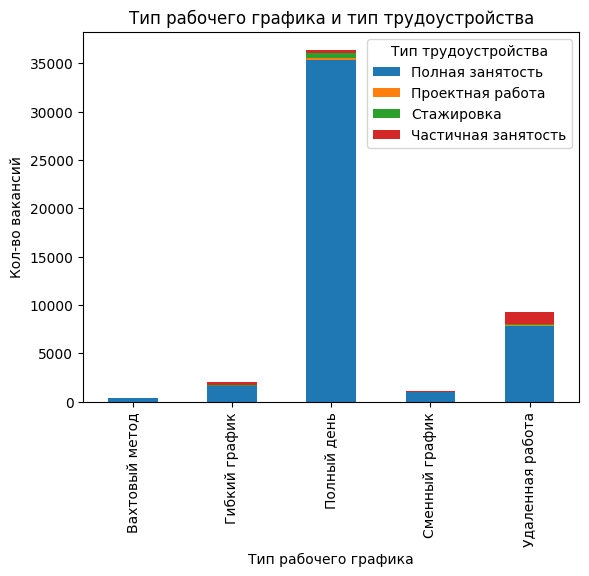

In [1479]:
grouped = query4_4.groupby(["Тип рабочего графика", "Тип трудоустройства"])["Кол-во вакансий"].sum().unstack()

fig, ax = plt.subplots()

grouped.plot(kind="bar", stacked=True, ax=ax)

ax.set_title("Тип рабочего графика и тип трудоустройства")
ax.set_xlabel("Тип рабочего графика")
ax.set_ylabel("Кол-во вакансий")

plt.show()



1. Региональная распространенность вакансий.
   - Москва имеет наибольшее количество вакансий, что указывает на высокую концентрацию IT-специалистов и спрос на их услуги в столичном регионе.
   - Санкт-Петербург также показывает значительное количество вакансий, что делает его вторым по популярности регионом для поиска работы в IT.

2. Анализ менее популярных регионов.
   - Регион с наименьшим количеством вакансий (например, Багаевская, Пролетарск и другие) может потребовать дополнительного анализа, чтобы понять, почему количество вакансий там так низко. Возможно, это связано с недостаточным развитием IT-сферы в этих регионах и количества проживающих людей там.

3. **Средняя нижняя граница зарплаты** составляет **71065.0 руб**., **средняя верхняя граница зарплаты** составляет **110537.0 руб**. 

**ВАЖНО** В запросе выше показано количество пустых значений в таблице vacancies. Стоблбец salary_from имеет 27712 пропущенных значений, столбе salary_to имеет 36507 пропущенных значений. Таким образом, можно сделать вывод, что опираться на эти данные нужно только после чательной обработки. 

4. В основном работодатели ищут работников на **полный рабочий день и полную занятость (35,4 тыс. вакансий)** , однако в редких случах можно найти частичную занятость и стажтровку. Самым не популярным типом трудоустройства при работе в полный день является проектная работа. После полного дня идет удаленная работа, где так же преобладает полная занятость (7802 вакансии), однако в данном рабочем графике больше вероятность найти частичную занятость, проектной работы здесь нет. Далее идет гибкий график, сменный график (тут присутствуют вакансии только на полную занятость) и вахтовый метод - самый непопулярный среди всех (насчитывает 367 вакансий на полный день и 2 вакансии на проектную работу). 

5. Самыми не популярными работниками являются те, у которых опыт работы более 6 лет, самыми востребованными - это те, у которых опыт работы от 3 до 6 лет. Я считаю, что такая тендения создалась из-за того, что работники с очень длительным опытом могут иметь какие-либо устаревшие навыки, а те у кого небольшой опыт работы, они еще полны энергией искать новые подходы. 
Новички популярнее тех, что работают более 6 лет, это происходт потому, что у них новый взгляд на рабочие процессы и нестандартное мышление. 



# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [1480]:
# текст запроса
query_5_1 = f'''SELECT 
                    e.name "Работодатели",
                    COUNT(v.id) "Кол-во вакансий"
                FROM employers e
                LEFT JOIN vacancies v ON v.employer_id = e.id 
                GROUP BY 1
                ORDER BY 2 desc
'''

In [1481]:
# результат запроса
query5_1 = pd.read_sql_query(query_5_1, connection)
query5_1

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/83725550.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатели,Кол-во вакансий
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
23170,Капитал Лайф Страхование Жизни,0
23171,AGASTONE,0
23172,Независимость,0
23173,Верховный Суд Республики Татарстан,0


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [1482]:
# текст запроса
query_5_2 = f'''SELECT 
                    a.name AS "Регион",
                    COUNT(distinct e.id) AS "Кол-во работодателей",
                    COUNT(v.id) AS "Кол-во вакансий"
                FROM areas a
                LEFT JOIN employers e ON e.area = a.id 
                LEFT JOIN vacancies v ON v.area_id = a.id 
                WHERE v.id IS NULL
                GROUP BY 1
                ORDER BY 2 DESC

'''

In [1483]:
# результат запроса
query5_2 = pd.read_sql_query(query_5_2, connection)
query5_2

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3982042913.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Регион,Кол-во работодателей,Кол-во вакансий
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [1484]:
# текст запроса
query_5_3 = f'''SELECT 
                    e.id AS "Работодатель id",
                    e.name AS "Работодатель",
                     COUNT(DISTINCT v.area_id) AS "Кол-во регионов"
                FROM employers e
                LEFT JOIN vacancies v ON e.id = v.employer_id
                GROUP BY e.id, e.name
                ORDER BY 3 DESC;
'''

In [1485]:
# результат запроса
query5_3 = pd.read_sql_query(query_5_3, connection)
query5_3

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3898498504.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатель id,Работодатель,Кол-во регионов
0,1740,Яндекс,181
1,2748,Ростелеком,152
2,5724811,Спецремонт,116
3,5130287,Поляков Денис Иванович,88
4,3682876,ООО ЕФИН,71
...,...,...,...
23496,5287515,Но Смокинг,0
23497,2839354,МАСТЕРСКАЯ CREED,0
23498,5774578,Dzing Finance,0
23499,5775069,КОРС,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [1486]:
# текст запроса
query_5_4 = f'''SELECT 
                    COUNT(e.id) AS "Работодатель"
                FROM employers e
                LEFT JOIN employers_industries ei ON ei.employer_id = e.id 
                WHERE industry_id IS NULL
'''

In [1487]:
# результат запроса
query5_4 = pd.read_sql_query(query_5_4, connection)
query5_4

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1479166284.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатель
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [1488]:
# текст запроса
query_5_5 = f'''SELECT 
                    e.name AS "Работодатель",
                    COUNT(ei.industry_id) AS "Кол-во сфер деятельности"
                FROM employers e
                LEFT JOIN employers_industries ei ON ei.employer_id = e.id
                GROUP BY e.id, e.name
                HAVING COUNT(ei.industry_id) = 4
                ORDER BY e.name
                LIMIT 1 OFFSET 2
'''

In [1489]:
# результат запроса
query5_5 = pd.read_sql_query(query_5_5, connection)
query5_5

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2860595413.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатель,Кол-во сфер деятельности
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [1490]:
# текст запроса
query_5_5 = f'''SELECT 
                    COUNT(e.id) AS "Кол-во работодателей"
                FROM employers e
                LEFT JOIN employers_industries ei ON ei.employer_id = e.id
                LEFT JOIN industries i ON ei.industry_id = i.id
                WHERE i.name = 'Разработка программного обеспечения'
'''

In [1491]:
# результат запроса
query5_5 = pd.read_sql_query(query_5_5, connection)
query5_5

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/2860595413.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во работодателей
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [1492]:
# Код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')  # Создаем объект BeautifulSoup, указывая html-парсер 
data = []
HTML_data = page.find_all("table")[0].find_all("tr")[1:]

for element in HTML_data:
    sub_data = []  # Инициализация sub_data перед каждой итерацией
    for i, k in enumerate(element):
        try:
            if i == 1:
                sub_data.append(k.get_text())
        except:
            continue
    if sub_data:  # Убедитесь, что sub_data не пустая
        data.append(sub_data)

data_result = []  # Инициализация data_result
for elem in data:
    data_result.extend(elem)

data_result = tuple(data_result)
data_result


('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [1493]:
# текст запроса
query_5_7 = f'''SELECT 
               "Название города",
               cnt
               FROM
               (SELECT 
               a.name AS "Название города",
               COUNT(v.id) AS cnt
               FROM areas a 
               LEFT JOIN vacancies v ON v.area_id = a.id
               LEFT JOIN employers AS e ON e.id = v.employer_id
               WHERE e.name = 'Яндекс'
               AND a.name IN {data_result}
               GROUP BY 1 

               UNION ALL

               SELECT 
               'Total' AS "Название города",
               COUNT(v.id) AS cnt
               FROM areas a 
               LEFT JOIN vacancies v ON v.area_id = a.id
               LEFT JOIN employers AS e ON e.id = v.employer_id
               WHERE e.name = 'Яндекс'
               AND a.name IN {data_result}
               GROUP BY 1) AS subquery
'''

In [1494]:
# результат запроса
query5_7 = pd.read_sql_query(query_5_7, connection)
query5_7

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3861239220.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Название города,cnt
0,Total,485
1,Волгоград,24
2,Воронеж,32
3,Екатеринбург,39
4,Казань,25
5,Краснодар,30
6,Красноярск,23
7,Москва,54
8,Нижний Новгород,36
9,Новосибирск,35


***

Анализ работодателей

1) Топ-5 работодателей по количеству вакансий: Яндекс (1933), Ростелеком (491), Тинькофф (444), СБЕР (428), Газпромнефть (331). Эти компании входят в список крупнейших компаний России по чистой прибыли, соответственно они масштабные и требуют большое количтвество работников.

2) В запросе, где необходимо для каждого региона вывести кол-во работодателей и вакансий в нем, где кол-во вакансий составляет 0. Этот запрос нам говорит о том, что данные нужно чистить. Копании вместо региона/города отметили страну. Это может привести к неясности в интерпретации данных при машинном обучении. Для целей машинного обучения целесообразно придерживаться унифицированного формата. Если анализировать данные по регионам, лучше, чтобы все записи только к регионам.

3) Одна компания может опубликовывать вакансии для любого количества регионов. 

4) Количество работодателей у которых не указана сфера деятельности - 8419. При том, что всего работодателей в базе 23501, это достаточно большой результат, над которым стоит задуматься, поскаольку он может усложнить машинное обучение. 

5) Яндекс имеет самое большое количество вакансий в разных регионах России, превое место занимет Москва с количеством вакансий - 54


1) Топ-5 работодателей по количеству вакансий: Яндекс (1933), Ростелеком (491), Тинькофф (444), СБЕР (428), Газпромнефть (331). Эти компании входят в список крупнейших компаний России по чистой прибыли, соответственно они масштабные и требуют большое количтвество работников.



# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [1510]:
# текст запроса
query_6_1 = '''SELECT 
               COUNT(v.id) 
               FROM vacancies v 
               WHERE v.name ILIKE '%data%' 
               OR v.name ILIKE '%данн%'
'''

In [1511]:
# результат запроса
query6_1 = pd.read_sql_query(query_6_1, connection)
query6_1

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3049230401.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [1552]:
# текст запроса
query_6_2 = '''SELECT 
    COUNT(v.id) 
FROM 
    vacancies v 
where (name ilike '%data scientist%'
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or name like '%ML%'
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%')
        and name not ilike '%html%'
        and (name ilike '%junior%'
        or experience ilike '%нет опыта%'
        or employment ilike '%стажировка%')
'''


In [1553]:
# результат запросa
query6_2 = pd.read_sql_query(query_6_2, connection)
query6_2

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/4146989655.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [1587]:
# текст запроса
query_6_3 = f'''select count(*)
    from vacancies
    where (name ilike '%data scientist%'
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or name like '%ML%'
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%')
        and name not ilike '%html%'
        and (key_skills ilike '%sql%'
        or key_skills ilike '%postgres%')
    '''

In [1588]:
query6_3 = pd.read_sql_query(query_6_3, connection)
query6_3

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/654267946.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [1597]:
# текст запроса
query_6_4 = f'''SELECT COUNT(*)
FROM vacancies
WHERE (name ILIKE '%data scientist%'
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR name ILIKE '%ML%'
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%')
    AND name NOT ILIKE '%html%'
    AND (key_skills ILIKE '%python%')
    '''

In [1598]:
# результат запроса
query6_4 = pd.read_sql_query(query_6_4, connection)
query6_4

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1972815694.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [1631]:
# текст запросаme NOT ILIKE '%html%'

query_6_5 = f'''select 
                    round(avg(length(key_skills) - length(replace(key_skills,CHR(9),''))+1),2)
                from vacancies v
                where (lower(v.name) like '%data scientist%' or lower(v.name) like '%data science%' or lower(v.name) like '%исследователь данных%' or ((v.name) like '%ML%' and lower(v.name) not like '%html%') or lower(v.name) like '%machine learning%' or lower(v.name) like '%машинн%обучен%') and v.key_skills is not null

'''


In [1632]:
# результат запроса
query6_5 = pd.read_sql_query(query_6_5, connection)
query6_5

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/3766865343.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [1642]:
# текст запроса
query_6_6 = f'''SELECT 
                    v.experience,
                    ROUND(AVG(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0)
                FROM VACANCIES v   
                WHERE  (LOWER(v.name) like '%data scientist%' or LOWER(v.name) like '%data science%' or LOWER(v.name) like '%исследователь данных%' or 
                LOWER(v.name) like '%machine learning%' or LOWER(v.name) like '%машинн%обучен%' or  (v.name not like '%HTML%' and v.name like '%ML%'))
                and v.key_skills IS NOT NULL
            GROUP BY v.experience
    '''


In [1643]:
# результат запроса
query6_6 = pd.read_sql_query(query_6_6, connection)
query6_6

/var/folders/9s/6j8xzmyj661fgs5255fhq26w0000gn/T/ipykernel_6660/1286912613.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,round
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,146704.0
3,От 3 до 6 лет,243115.0


***

) Количество вакансий, подходящих под наш анализ составляет 1771, остальные 47426 вакансий из базы не относятся к тем, что имеют отношние с данными. 

2) В датасайнс есть 536 вакансий и только 51 из них подходит для начинающих специалистов. 

3) В датасайнс преимущественно обладать навыками такого языка программирования как Python (357), далее SQL (229). 

4) Для работы дата-саентистом, лучше иметь более 6 навыков в профессионалной области. 

5) Как и во всех профессиях, начинающие специалисты получают заработную плату меньше, чем те, что работают уже продолжительное время. Таким образом, при отсутствии опыта, работник в среднем претендует на заработную плату в 74643, для тех кто уже имеет опыт от 3х до 6и лет претендует на заработную плату 243115 руб.

# Общий вывод по проекту

1. Объем рынка вакансий:
   - В базе данных насчитывается 49,197 вакансий и 23,501 работодателей. Это свидетельствует о большом разнообразии предложений и конкурентоспособности рынка труда.

2. Региональное распределение:
   - Вакансии распределены по 1,362 регионам, при этом наблюдается явная зависимость между размером города и количеством открытых вакансий. Крупные города с развитой экономикой требуют больше работников, что указывает на важность регионального аспекта при анализе.

3. Сферы деятельности:
   - Наиболее популярные сферы включают разработку ПО и системную автоматизацию. Рекомендуется классифицировать вакансии на ИТ и не-ИТ, чтобы лучше понять потребности рынка.

4. Заработная плата:
   - Желания работников варьируются от 35,000 до 113,409 рублей. Высокие зарплаты в крупных городах обусловлены высокой стоимостью жизни, концентрацией компаний и спросом на квалифицированные кадры.

5. Тип занятости:
   - Преобладает спрос на полную занятость (35,4 тыс. вакансий). Частичная занятость и стажировки встречаются реже, что говорит о стабильной и постоянной занятости, востребованной работодателями.

6. Крупнейшие работодатели:
   - Топ-5 работодателей (Яндекс, Ростелеком, Тинькофф, СБЕР, Газпромнефть) требуют значительное количество работников и представляют крупные организации в России, что подтверждает высокий уровень доверия к данным компаниям.

Выводы:
- Рынок труда демонстрирует высокий уровень динамики и потребности в ИТ-специалистах, особенно в крупных городах.
- Необходимо проводить дальнейшие исследования для уменьшения искажений в данных и улучшения внедрения машинного обучения.
- Разделение вакансий на категории и анализ их изменений со временем поможет значительно повысить качество прогноза и принятия бизнес-решений работодателями.
- Важно учитывать региональные особенности при анализе вакансий и зарплат, чтобы выявить паттерны и подготовиться к изменениям на рынке труда.